In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
disasters=pd.read_csv('static/data/natural_disasters.csv')
disasters

,dis_no,year,seq,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,event_name,country,standardized,...,"reconstruction_costs,_adjusted_('000_us$)",insured_damages_('000_us$),"insured_damages,_adjusted_('000_us$)",total_damages_('000_us$),"total_damages,_adjusted_('000_us$)",location_estimate,start_date,end_date,lat,lng
0,1990-0248-AFG,1990,248,Natural,Meteorological,Extreme temperature,Cold wave,0,Afghanistan,Afghanistan,...,0,0,0,0,0,Afghanistan,1/3/1990,1/3/1990,33.939110,67.709953
1,1991-0498-AFG,1991,498,Natural,Geophysical,Earthquake,Ground movement,0,Afghanistan,Afghanistan,...,0,0,0,0,0,Keshim (Badakhshan province),4/2/1991,4/2/1991,36.571295,70.336069
2,1991-0033-AFG,1991,33,Natural,Geophysical,Earthquake,Ground movement,0,Afghanistan,Afghanistan,...,0,0,0,0,0,Konar,1/3/1991,1/3/1991,33.939110,67.709953
3,1991-0032-AFG,1991,32,Natural,Hydrological,Flood,Riverine flood,0,Afghanistan,Afghanistan,...,0,0,0,60000,119377,Badakhstan,2/6/1991,2/2/1991,36.734772,70.811995
4,1991-0130-AFG,1991,130,Natural,Hydrological,Flood,Riverine flood,0,Afghanistan,Afghanistan,...,0,0,0,0,0,Arabjar,5/3/1991,6/4/1991,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12297,2019-0094-ZWE,2019,94,Natural,Hydrological,Flood,Flash flood,0,Zimbabwe,Zimbabwe,...,0,0,0,0,0,Masvingo,2/1/2019,2/2/2019,-20.074400,30.832800
12298,2021-0036-ZWE,2021,36,Natural,Meteorological,Storm,Tropical cyclone,Tropical cyclone 'Eloise',Zimbabwe,Zimbabwe,...,0,0,0,0,0,Chivi,1/2/2021,1/2/2021,-19.015438,29.154857
12299,2021-9786-ZWE,2021,9786,Natural,Climatological,Drought,Drought,0,Zimbabwe,Zimbabwe,...,0,0,0,0,0,Matabeleland South,8/1/2021,2/1/2022,-19.015438,29.154857
12300,2022-0052-ZWE,2022,52,Natural,Meteorological,Storm,Tropical cyclone,Tropical storm 'Ana',Zimbabwe,Zimbabwe,...,0,0,0,0,0,Kariba,1/2/2022,1/2/2022,-16.533300,28.800000


In [9]:
summary = disasters[['year','disaster_type','total_deaths', 'total_affected',"total_damages_('000_us$)"]]

In [3]:
disasters.columns

Index(['dis_no', 'year', 'seq', 'disaster_group', 'disaster_subgroup',
       'disaster_type', 'disaster_subtype', 'event_name', 'country',
       'standardized', 'region', 'continent', 'location',
       'aid_contribution_('000_us$)', 'dis_mag_value', 'dis_mag_scale',
       'start_year', 'start_month', 'start_day', 'end_year', 'end_month',
       'end_day', 'total_deaths', 'total_affected',
       'reconstruction_costs_('000_us$)',
       'reconstruction_costs,_adjusted_('000_us$)',
       'insured_damages_('000_us$)', 'insured_damages,_adjusted_('000_us$)',
       'total_damages_('000_us$)', 'total_damages,_adjusted_('000_us$)',
       'location_estimate', 'start_date', 'end_date', 'lat', 'lng'],
      dtype='object')

In [10]:
yearly = summary.groupby('year').sum()
yearly['total_occurrences']=summary.groupby('year').count()['disaster_type']

In [14]:
yearly.columns

Index(['total_deaths', 'total_affected', 'total_damages_('000_us$)',
       'total_occurrences'],
      dtype='object')

<AxesSubplot:xlabel='year'>

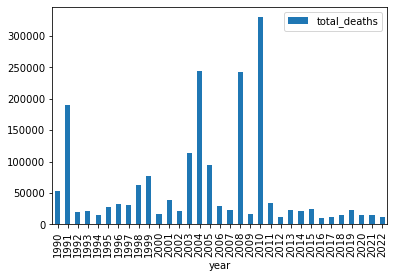

In [12]:
yearly.plot(kind='bar',y='total_deaths')

<AxesSubplot:xlabel='year'>

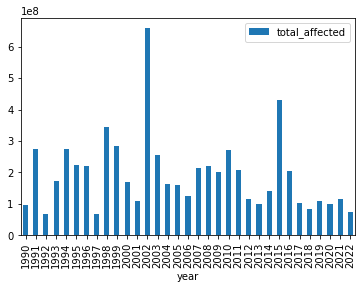

In [13]:
yearly.plot(kind='bar',y='total_affected')

<AxesSubplot:xlabel='year'>

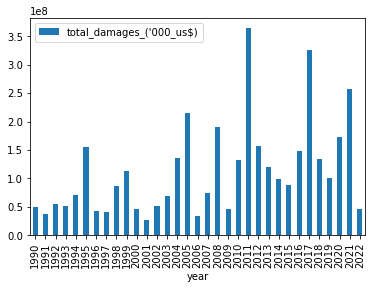

In [15]:
yearly.plot(kind='bar',y="total_damages_('000_us$)")

<AxesSubplot:xlabel='year'>

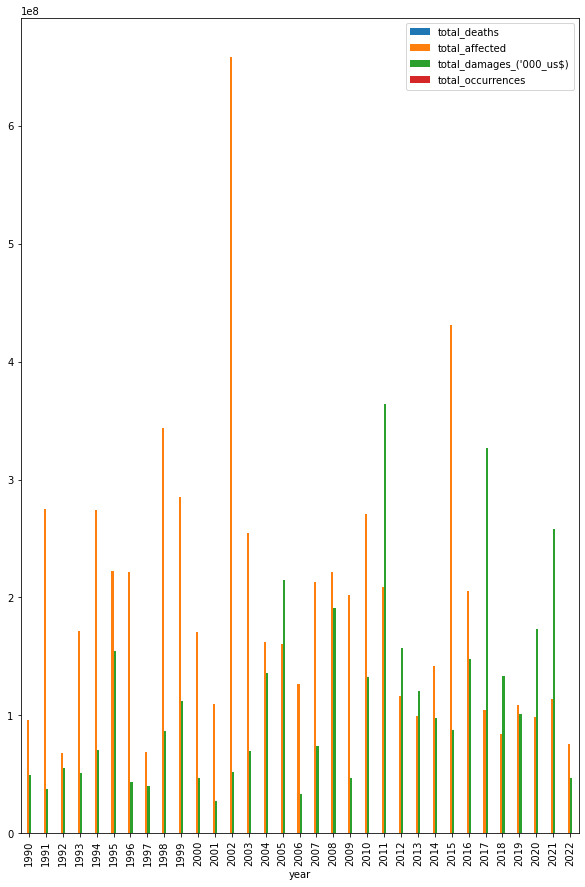

In [17]:
yearly.plot(kind='bar',figsize=(10,15))

In [19]:
drought = summary.loc[(summary['disaster_type']=='Drought') | (summary['disaster_type']=='Extreme temperature'),:]
drought

,year,disaster_type,total_deaths,total_affected,total_damages_('000_us$)
0,1990,Extreme temperature,144,0,0
6,1991,Extreme temperature,80,200,0
36,2000,Drought,37,2580000,50
42,2001,Extreme temperature,150,100000,10
44,2001,Extreme temperature,177,100000,0
...,...,...,...,...,...
12274,2007,Drought,0,2100000,0
12280,2010,Drought,0,1667618,0
12287,2013,Drought,0,4300000,500000
12294,2017,Drought,0,6900000,0


<AxesSubplot:xlabel='year'>

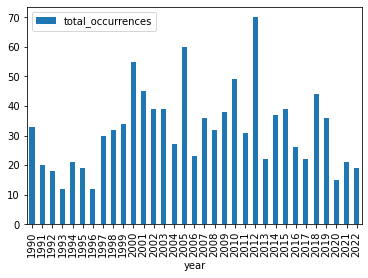

In [24]:
droughtyearly = drought.groupby('year').sum()
droughtyearly['total_occurrences'] = drought.groupby('year').count()['disaster_type']
droughtyearly.plot(kind='bar',y='total_occurrences')

In [38]:
natural = pd.read_csv('static/data/1950toPresent.csv')
natural

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1950-0008-IND,1950,8,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,20000.0,224746.0,8.898947,NaN,NaN,NaN,NaN
1,1950-0009-ATG,1950,9,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Dog,...,NaN,NaN,NaN,1000.0,11237.0,8.898947,NaN,NaN,NaN,NaN
2,1950-0012-CAN,1950,12,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,NaN,NaN,NaN,8.898947,NaN,NaN,NaN,NaN
3,1950-0017-CAN,1950,17,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,100000.0,1123728.0,8.898947,NaN,NaN,NaN,NaN
4,1950-0007-CHN,1950,7,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.898947,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2022-0356-ZAF,2022,356,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15828,2022-0209-COD,2022,209,NaN,Natural,Meteorological,Storm,Convective storm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15829,2022-0255-COD,2022,255,EP-2022-000202,Natural,Biological,Epidemic,Viral disease,NaN,Plague,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,14992,Ituri (Adm2).
15830,2022-0263-COD,2022,263,EP-2022-000205,Natural,Biological,Epidemic,Viral disease,NaN,Ebola Virus Disease,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
natural = natural.drop(columns=['Seq', 'Glide','Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations','No Injured', 'No Affected', 'No Homeless','Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',"Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)","Total Damages, Adjusted ('000 US$)", 'CPI','Disaster Group','Disaster Subtype'])
natural

,Dis No,Year,Disaster Subgroup,Disaster Type,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1950-0008-IND,1950,Geophysical,Earthquake,NaN,NaN,India,IND,Southern Asia,Asia,Assam province,1950,8.0,15.0,1950,8.0,15.0,1500.0,NaN,20000.0
1,1950-0009-ATG,1950,Meteorological,Storm,NaN,Dog,Antigua and Barbuda,ATG,Caribbean,Americas,NaN,1950,9.0,1.0,1950,9.0,1.0,2.0,NaN,1000.0
2,1950-0012-CAN,1950,Meteorological,Storm,Tornado,NaN,Canada,CAN,Northern America,Americas,Regina,1950,11.0,NaN,1950,11.0,NaN,NaN,NaN,NaN
3,1950-0017-CAN,1950,Hydrological,Flood,NaN,NaN,Canada,CAN,Northern America,Americas,"Winnipeg, Manitoba",1950,5.0,5.0,1950,5.0,5.0,1.0,107000.0,100000.0
4,1950-0007-CHN,1950,Hydrological,Flood,NaN,NaN,China,CHN,Eastern Asia,Asia,Anhwei province,1950,8.0,14.0,1950,8.0,14.0,500.0,10000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2022-0356-ZAF,2022,Hydrological,Flood,NaN,NaN,South Africa,ZAF,Southern Africa,Africa,"Kleinvlei, Ravensmead, Goodwood, Strand, Bonte...",2022,6.0,13.0,2022,6.0,15.0,NaN,204.0,NaN
15828,2022-0209-COD,2022,Meteorological,Storm,NaN,NaN,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,NaN,2022,1.0,21.0,2022,2.0,2.0,26.0,NaN,NaN
15829,2022-0255-COD,2022,Biological,Epidemic,NaN,Plague,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,"Rethy, Angumu (Ituri)",2022,4.0,4.0,2022,5.0,2.0,2.0,91738.0,NaN
15830,2022-0263-COD,2022,Biological,Epidemic,NaN,Ebola Virus Disease,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,"Wangata, Mbandaka (Equateur Province)",2022,4.0,19.0,2022,7.0,31.0,5.0,141.0,NaN


In [33]:
natural.columns

Index(['Dis No', 'Year', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Location', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages ('000 US$)'],
      dtype='object')

In [40]:
natural.columns=natural.columns.str.strip().str.lower().str.replace(' ','_')
natural= natural.rename(str.strip, axis ='columns')

In [42]:
natural=natural.fillna(0)

In [45]:
natural['start_month']=natural['start_month'].replace(0,1).map("{:.1}".format)
natural['start_day']=natural['start_day'].replace(0,1).map("{:.1}".format)
natural['end_month']=natural['end_month'].replace(0,1).map("{:.1}".format)
natural['end_day']=natural['end_day'].replace(0,1).map("{:.1}".format)
natural

,dis_no,year,disaster_subgroup,disaster_type,disaster_subsubtype,event_name,country,iso,region,continent,...,start_month,start_day,end_year,end_month,end_day,total_deaths,total_affected,total_damages_('000_us$),start_date,end_date
0,1950-0008-IND,1950,Geophysical,Earthquake,0,0,India,IND,Southern Asia,Asia,...,8,2,1950,8,2,1500.0,0.0,20000.0,1950-8e+00-2e+01,1950-8e+00-2e+01
1,1950-0009-ATG,1950,Meteorological,Storm,0,Dog,Antigua and Barbuda,ATG,Caribbean,Americas,...,9,1,1950,9,1,2.0,0.0,1000.0,1950-9e+00-1e+00,1950-9e+00-1e+00
2,1950-0012-CAN,1950,Meteorological,Storm,Tornado,0,Canada,CAN,Northern America,Americas,...,1,1,1950,1,1,0.0,0.0,0.0,1950-1e+01-1e+00,1950-1e+01-1e+00
3,1950-0017-CAN,1950,Hydrological,Flood,0,0,Canada,CAN,Northern America,Americas,...,5,5,1950,5,5,1.0,107000.0,100000.0,1950-5e+00-5e+00,1950-5e+00-5e+00
4,1950-0007-CHN,1950,Hydrological,Flood,0,0,China,CHN,Eastern Asia,Asia,...,8,1,1950,8,1,500.0,10000000.0,0.0,1950-8e+00-1e+01,1950-8e+00-1e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2022-0356-ZAF,2022,Hydrological,Flood,0,0,South Africa,ZAF,Southern Africa,Africa,...,6,1,2022,6,2,0.0,204.0,0.0,2022-6e+00-1e+01,2022-6e+00-2e+01
15828,2022-0209-COD,2022,Meteorological,Storm,0,0,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,...,1,2,2022,2,2,26.0,0.0,0.0,2022-1e+00-2e+01,2022-2e+00-2e+00
15829,2022-0255-COD,2022,Biological,Epidemic,0,Plague,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,...,4,4,2022,5,2,2.0,91738.0,0.0,2022-4e+00-4e+00,2022-5e+00-2e+00
15830,2022-0263-COD,2022,Biological,Epidemic,0,Ebola Virus Disease,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,...,4,2,2022,7,3,5.0,141.0,0.0,2022-4e+00-2e+01,2022-7e+00-3e+01


In [46]:
natural['start_date']=natural['start_year'].astype('str')+'-'+natural['start_month']+'-'+natural['start_day']
natural['end_date']=natural['end_year'].astype('str')+'-'+natural['end_month']+'-'+natural['end_day']
natural['start_date']=pd.to_datetime(natural['start_date'])
natural['end_date']=pd.to_datetime(natural['end_date'])

In [49]:
natural = natural.drop(columns=['disaster_subsubtype','event_name'])
natural

,dis_no,year,disaster_subgroup,disaster_type,country,iso,region,continent,location,start_year,start_month,start_day,end_year,end_month,end_day,total_deaths,total_affected,total_damages_('000_us$),start_date,end_date
0,1950-0008-IND,1950,Geophysical,Earthquake,India,IND,Southern Asia,Asia,Assam province,1950,8,2,1950,8,2,1500.0,0.0,20000.0,1950-08-02,1950-08-02
1,1950-0009-ATG,1950,Meteorological,Storm,Antigua and Barbuda,ATG,Caribbean,Americas,0,1950,9,1,1950,9,1,2.0,0.0,1000.0,1950-09-01,1950-09-01
2,1950-0012-CAN,1950,Meteorological,Storm,Canada,CAN,Northern America,Americas,Regina,1950,1,1,1950,1,1,0.0,0.0,0.0,1950-01-01,1950-01-01
3,1950-0017-CAN,1950,Hydrological,Flood,Canada,CAN,Northern America,Americas,"Winnipeg, Manitoba",1950,5,5,1950,5,5,1.0,107000.0,100000.0,1950-05-05,1950-05-05
4,1950-0007-CHN,1950,Hydrological,Flood,China,CHN,Eastern Asia,Asia,Anhwei province,1950,8,1,1950,8,1,500.0,10000000.0,0.0,1950-08-01,1950-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2022-0356-ZAF,2022,Hydrological,Flood,South Africa,ZAF,Southern Africa,Africa,"Kleinvlei, Ravensmead, Goodwood, Strand, Bonte...",2022,6,1,2022,6,2,0.0,204.0,0.0,2022-06-01,2022-06-02
15828,2022-0209-COD,2022,Meteorological,Storm,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,0,2022,1,2,2022,2,2,26.0,0.0,0.0,2022-01-02,2022-02-02
15829,2022-0255-COD,2022,Biological,Epidemic,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,"Rethy, Angumu (Ituri)",2022,4,4,2022,5,2,2.0,91738.0,0.0,2022-04-04,2022-05-02
15830,2022-0263-COD,2022,Biological,Epidemic,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,"Wangata, Mbandaka (Equateur Province)",2022,4,2,2022,7,3,5.0,141.0,0.0,2022-04-02,2022-07-03


In [50]:
import requests
from config import gmap_key

In [76]:
country = natural[['country','iso']].drop_duplicates()

In [82]:
country['lat']=''
country['lng']=''
for index,row in country.iterrows():
    try:
        target=row['country']
        url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target}&key={gmap_key}"
        response = requests.get(url).json()
        lat = response['results'][0]['geometry']['location']['lat']
        lng = response['results'][0]['geometry']['location']['lng']
        country.loc[index,'lat']=lat
        country.loc[index,'lng']=lng
    except IndexError:
        try:
            target=row['iso']
            url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target}&key={gmap_key}"
            response = requests.get(url).json()
            lat = response['results'][0]['geometry']['location']['lat']
            lng = response['results'][0]['geometry']['location']['lng']
            country.loc[index,'lat']=lat
            country.loc[index,'lng']=lng
        except:
            print(f'{row["country"]} not found')

Czechoslovakia not found
Soviet Union not found
Yugoslavia not found
Serbia Montenegro not found


In [83]:
country.to_csv('country_coordinates.csv')
# Manually entering coordinates for the rest

In [85]:
cleanedcountry=pd.read_csv('country_coordinates.csv')

In [89]:
cleaned_disasters = pd.merge(natural,country,on='iso').drop(columns=['country_y']).rename(columns={'country_x':'country'})
cleaned_disasters.to_csv('1950PresentData.csv')

In [16]:
disasters = pd.read_csv('1950PresentData.csv',)
disasters

,dis_no,year,disaster_subgroup,disaster_type,country,iso,region,continent,location,start_year,...,end_year,end_month,end_day,total_deaths,total_affected,total_damages_('000_us$),start_date,end_date,lat,lng
0,1950-0008-IND,1950,Geophysical,Earthquake,India,IND,Southern Asia,Asia,Assam province,1950,...,1950,8,2,1500,0,20000,8/2/1950,8/2/1950,20.593684,78.962880
1,1950-0006-IND,1950,Hydrological,Flood,India,IND,Southern Asia,Asia,Saurashtra,1950,...,1950,7,1,45,25000,0,7/1/1950,7/1/1950,20.593684,78.962880
2,1950-0011-IND,1950,Meteorological,Storm,India,IND,Southern Asia,Asia,West,1950,...,1950,9,1,90,0,0,9/1/1950,9/1/1950,20.593684,78.962880
3,1950-0026-IND,1950,Hydrological,Flood,India,IND,Southern Asia,Asia,0,1950,...,1950,6,1,100,0,0,6/1/1950,6/1/1950,20.593684,78.962880
4,1952-0011-IND,1952,Meteorological,Storm,India,IND,Southern Asia,Asia,"Tanjore, Tiruchi",1952,...,1952,1,3,400,1000000,0,1/3/1952,1/3/1952,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2018-0390-QAT,2018,Hydrological,Flood,Qatar,QAT,Western Asia,Asia,Doha,2018,...,2018,1,2,0,1500,10000,1/2/2018,1/2/2018,25.354826,51.183884
15828,2017-0381-BLM,2017,Meteorological,Storm,Saint Barthélemy,BLM,Caribbean,Americas,0,2017,...,2017,9,9,4,0,0,9/8/2017,9/9/2017,17.900000,-62.833333
15829,2017-0381-MAF,2017,Meteorological,Storm,Saint Martin (French Part),MAF,Caribbean,Americas,0,2017,...,2017,9,9,12,110,4100000,9/8/2017,9/9/2017,18.082550,-63.052251
15830,2017-0381-SXM,2017,Meteorological,Storm,Sint Maarten (Dutch part),SXM,Caribbean,Americas,0,2017,...,2017,9,9,4,5040,2500000,9/8/2017,9/9/2017,18.042480,-63.054830


In [31]:
subSelect = disasters.loc[(disasters['disaster_type']=="Flood") | (disasters['disaster_type']=="Drought") \
                          | (disasters['disaster_type']=="Extreme temperature") | (disasters['disaster_type']=="Storm") \
                         |(disasters['disaster_type']=="Wildfire"),:]
subSelect=subSelect[['country','year','disaster_type','total_deaths', 'total_affected',
       "total_damages_('000_us$)",'start_date']]

In [32]:
subSelect['decade']=''
for index, row in subSelect.iterrows():
    year = row['year']
    if year > 2020:
        subSelect.loc[index,'decade']=2020
    elif year>2010:
        subSelect.loc[index,'decade']=2010
    elif year>2000:
        subSelect.loc[index,'decade']=2000
    elif year>1990:
        subSelect.loc[index,'decade']=1990
    elif year>1980:
        subSelect.loc[index,'decade']=1980
    elif year>1970:
        subSelect.loc[index,'decade']=1970
    elif year>1960:
        subSelect.loc[index,'decade']=1960
    else:
        subSelect.loc[index,'decade']=1950

In [8]:
subSelect

,dis_no,year,disaster_subgroup,disaster_type,country,iso,region,continent,location,start_year,...,end_month,end_day,total_deaths,total_affected,total_damages_('000_us$),start_date,end_date,lat,lng,decade
1,1950-0006-IND,1950,Hydrological,Flood,India,IND,Southern Asia,Asia,Saurashtra,1950,...,7,1,45,25000,0,7/1/1950,7/1/1950,20.593684,78.962880,1950
2,1950-0011-IND,1950,Meteorological,Storm,India,IND,Southern Asia,Asia,West,1950,...,9,1,90,0,0,9/1/1950,9/1/1950,20.593684,78.962880,1950
3,1950-0026-IND,1950,Hydrological,Flood,India,IND,Southern Asia,Asia,0,1950,...,6,1,100,0,0,6/1/1950,6/1/1950,20.593684,78.962880,1950
4,1952-0011-IND,1952,Meteorological,Storm,India,IND,Southern Asia,Asia,"Tanjore, Tiruchi",1952,...,1,3,400,1000000,0,1/3/1952,1/3/1952,20.593684,78.962880,1950
5,1952-0025-IND,1952,Meteorological,Storm,India,IND,Southern Asia,Asia,0,1952,...,9,1,350,0,0,9/1/1952,9/1/1952,20.593684,78.962880,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2018-0390-QAT,2018,Hydrological,Flood,Qatar,QAT,Western Asia,Asia,Doha,2018,...,1,2,0,1500,10000,1/2/2018,1/2/2018,25.354826,51.183884,2010
15828,2017-0381-BLM,2017,Meteorological,Storm,Saint Barthélemy,BLM,Caribbean,Americas,0,2017,...,9,9,4,0,0,9/8/2017,9/9/2017,17.900000,-62.833333,2010
15829,2017-0381-MAF,2017,Meteorological,Storm,Saint Martin (French Part),MAF,Caribbean,Americas,0,2017,...,9,9,12,110,4100000,9/8/2017,9/9/2017,18.082550,-63.052251,2010
15830,2017-0381-SXM,2017,Meteorological,Storm,Sint Maarten (Dutch part),SXM,Caribbean,Americas,0,2017,...,9,9,4,5040,2500000,9/8/2017,9/9/2017,18.042480,-63.054830,2010


In [22]:
decade = subSelect.groupby(['decade','disaster_type']).count()['start_date']
decade['death_avg']=subSelect.groupby(['decade','disaster_type']).mean()['total_deaths']
decade['affected_avg']=subSelect.groupby(['decade','disaster_type']).mean()['total_affected']
decade['damages_avg']=subSelect.groupby(['decade','disaster_type']).mean()["total_damages_('000_us$)"]




In [33]:
decade = subSelect.groupby(['decade','disaster_type']).mean()
decade['instances'] = subSelect.groupby(['decade','disaster_type']).count()['start_date']

In [35]:
decade.to_csv('decade_breakdown.csv')

<AxesSubplot:xlabel='decade,disaster_type'>

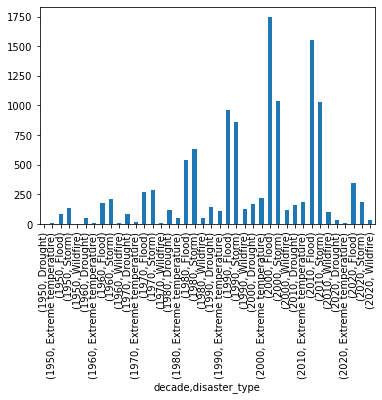

In [10]:
decade.plot(kind='bar')

In [1]:
import pandas as pd

In [17]:
disasters=pd.read_csv('1950PresentData.csv')
disasters=disasters.rename(columns={"total_damages_('000_us$)":'total_damages'})
disasters.to_csv('1950PresentData.csv')

In [16]:
summary=disasters[['country','year','disaster_type','total_deaths', 'total_affected',
       "total_damages"]]

In [14]:
totals = summary.groupby(['country']).sum()
totals['total_occurences']=summary.groupby(['country']).count()['disaster_type']

In [12]:
coordinates = pd.read_csv('country_coordinates.csv')
coordinates

,country,iso,lat,lng
0,India,IND,20.593684,78.962880
1,Antigua and Barbuda,ATG,17.060816,-61.796428
2,Canada,CAN,56.130366,-106.346771
3,China,CHN,35.861660,104.195397
4,Colombia,COL,4.570868,-74.297333
...,...,...,...,...
223,Qatar,QAT,25.354826,51.183884
224,Saint Barthélemy,BLM,17.900000,-62.833333
225,Saint Martin (French Part),MAF,18.082550,-63.052251
226,Sint Maarten (Dutch part),SXM,18.042480,-63.054830


In [14]:
merge = pd.merge(totals,coordinates,on='country',how='left')
merge.to_csv('1950PresentSummary.csv')

In [19]:
disasters
summary=disasters[['continent','country','year','disaster_type','total_deaths', 'total_affected',
       "total_damages"]]

In [20]:
continent = summary.groupby('continent').sum()
continent['total_occurrences']=summary.groupby('continent').count()['disaster_type']
continent

,year,total_deaths,total_affected,total_damages,total_occurrences
continent,,,,,
Africa,5969125,952537,658881753,42874193,2981
Americas,7775504,574686,453500840,1719023517,3890
Asia,12630132,5827332,7197506433,1663260100,6317
Europe,3943456,215125,46486422,467398844,1971
Oceania,1344741,14895,26932486,109517689,673


<AxesSubplot:ylabel='total_occurrences'>

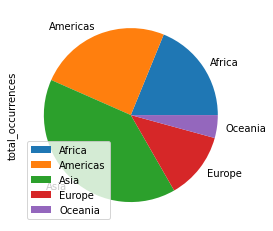

In [21]:
continent.plot.pie(y='total_occurrences')

In [24]:
bd_continent = summary.groupby(['continent','disaster_type']).sum()
bd_continent['total_occurrences']=summary.groupby(['continent','disaster_type']).count()['year']

In [26]:
bd_continent.to_csv('continent_breakdown.csv')

In [28]:
for index, row in summary.iterrows():
    year = row['year']
    if year > 2020:
        summary.loc[index,'decade']=2020
    elif year>2010:
        summary.loc[index,'decade']=2010
    elif year>2000:
        summary.loc[index,'decade']=2000
    elif year>1990:
        summary.loc[index,'decade']=1990
    elif year>1980:
        summary.loc[index,'decade']=1980
    elif year>1970:
        summary.loc[index,'decade']=1970
    elif year>1960:
        summary.loc[index,'decade']=1960
    else:
        summary.loc[index,'decade']=1950

C:\Users\nigel\AppData\Local\Temp\ipykernel_39952\3276565178.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary.loc[index,'decade']=1950


In [35]:
continent_decade=summary.groupby(['continent','decade']).mean()
continent_decade['total_occurrences']=summary.groupby(['continent','decade']).count()['year']

In [37]:
continent_decade.to_csv('continent_decade.csv')

In [43]:
totals=summary.drop(columns='decade').groupby(['country','year']).sum()
totals=totals.reset_index()

In [44]:
totals

,country,year,total_deaths,total_affected,total_damages
0,Afghanistan,1954,2000,0,0
1,Afghanistan,1956,151,2000,25000
2,Afghanistan,1963,107,0,0
3,Afghanistan,1969,0,48000,200
4,Afghanistan,1971,100,0,0
...,...,...,...,...,...
5655,Zimbabwe,2017,251,7013023,189000
5656,Zimbabwe,2018,12,5164,0
5657,Zimbabwe,2019,654,270186,0
5658,Zimbabwe,2021,3,169900,0


In [45]:
totals['deaths_sum']=""
totals['affected_sum']=""
totals['damages_sum']=""
# for index,row in totals.iterrows():
for i in range(len(totals)):
    if i==0:
        totals.iloc[i,5]=totals.iloc[i,2]
        totals.iloc[i,6]=totals.iloc[i,3]
        totals.iloc[i,7]=totals.iloc[i,4]
    elif totals.iloc[i-1,0]!=totals.iloc[i,0]:
        totals.iloc[i,5]=totals.iloc[i,2]
        totals.iloc[i,6]=totals.iloc[i,3]
        totals.iloc[i,7]=totals.iloc[i,4]
    else:
        totals.iloc[i,5]=int(totals.iloc[i,2])+int(totals.iloc[(i-1),5])
        totals.iloc[i,6]=int(totals.iloc[i,3])+int(totals.iloc[(i-1),6])
        totals.iloc[i,7]=int(totals.iloc[i,4])+int(totals.iloc[(i-1),7])

In [46]:
totals

,country,year,total_deaths,total_affected,total_damages,deaths_sum,affected_sum,damages_sum
0,Afghanistan,1954,2000,0,0,2000,0,0
1,Afghanistan,1956,151,2000,25000,2151,2000,25000
2,Afghanistan,1963,107,0,0,2258,2000,25000
3,Afghanistan,1969,0,48000,200,2258,50000,25200
4,Afghanistan,1971,100,0,0,2358,50000,25200
...,...,...,...,...,...,...,...,...
5655,Zimbabwe,2017,251,7013023,189000,6935,27104927,1037700
5656,Zimbabwe,2018,12,5164,0,6947,27110091,1037700
5657,Zimbabwe,2019,654,270186,0,7601,27380277,1037700
5658,Zimbabwe,2021,3,169900,0,7604,27550177,1037700


In [47]:
totals.to_csv('summations.csv')

In [53]:
floods=summary.loc[summary['disaster_type']=='Flood',:]
floods_sum=floods.groupby('year').sum()
floods_sum['num_of_floods']=floods.groupby('year').count()['disaster_type']
floods_sum

,total_deaths,total_affected,total_damages,decade,num_of_floods
year,,,,,
1950,3808,10132000,100000,19500.0,10
1951,5666,492034,1329000,13650.0,7
1952,199,0,0,7800.0,4
1953,7125,2191110,300000,23400.0,12
1954,34436,0,50000,17550.0,9
...,...,...,...,...,...
2018,2881,34256857,19714152,257280.0,128
2019,5149,34803936,36828100,391950.0,195
2020,6185,34353355,51456661,406020.0,202


<AxesSubplot:xlabel='year'>

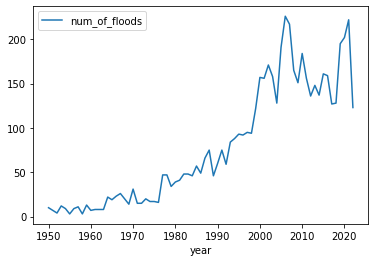

In [54]:
floods_sum.plot(kind='line',y='num_of_floods')

In [4]:
disasters=pd.read_csv('1950PresentData.csv')

In [5]:
disasters

,dis_no,year,disaster_subgroup,disaster_type,disaster_subtype,country,iso,region,continent,location,...,end_year,end_month,end_day,total_deaths,total_affected,total_damages,start_date,end_date,lat,lng
0,1950-0008-IND,1950,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,Assam province,...,1950,8,2,1500,0,20000,8/2/1950,8/2/1950,20.593684,78.962880
1,1950-0006-IND,1950,Hydrological,Flood,Riverine flood,India,IND,Southern Asia,Asia,Saurashtra,...,1950,7,1,45,25000,0,7/1/1950,7/1/1950,20.593684,78.962880
2,1950-0011-IND,1950,Meteorological,Storm,0,India,IND,Southern Asia,Asia,West,...,1950,9,1,90,0,0,9/1/1950,9/1/1950,20.593684,78.962880
3,1950-0026-IND,1950,Hydrological,Flood,0,India,IND,Southern Asia,Asia,0,...,1950,6,1,100,0,0,6/1/1950,6/1/1950,20.593684,78.962880
4,1952-0011-IND,1952,Meteorological,Storm,Tropical cyclone,India,IND,Southern Asia,Asia,"Tanjore, Tiruchi",...,1952,1,3,400,1000000,0,1/3/1952,1/3/1952,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2018-0390-QAT,2018,Hydrological,Flood,Flash flood,Qatar,QAT,Western Asia,Asia,Doha,...,2018,1,2,0,1500,10000,1/2/2018,1/2/2018,25.354826,51.183884
15828,2017-0381-BLM,2017,Meteorological,Storm,Tropical cyclone,Saint Barthélemy,BLM,Caribbean,Americas,0,...,2017,9,9,4,0,0,9/8/2017,9/9/2017,17.900000,-62.833333
15829,2017-0381-MAF,2017,Meteorological,Storm,Tropical cyclone,Saint Martin (French Part),MAF,Caribbean,Americas,0,...,2017,9,9,12,110,4100000,9/8/2017,9/9/2017,18.082550,-63.052251
15830,2017-0381-SXM,2017,Meteorological,Storm,Tropical cyclone,Sint Maarten (Dutch part),SXM,Caribbean,Americas,0,...,2017,9,9,4,5040,2500000,9/8/2017,9/9/2017,18.042480,-63.054830


In [8]:
summary=disasters[['continent','country','year','disaster_type','disaster_subtype','total_deaths', 'total_affected',
       "total_damages"]]
totals_bytype=summary.groupby(['country','disaster_type']).sum()
totals_bytype['total_occurrences']=summary.groupby(['country','disaster_type']).count()['year']

In [12]:
totals_bytype.to_csv('type_breakdown.csv')

In [15]:
import pandas as pd
disasters=pd.read_csv('1950PresentData.csv')
disasters

,dis_no,year,disaster_subgroup,disaster_type,disaster_subtype,country,iso,region,continent,location,...,end_year,end_month,end_day,total_deaths,total_affected,total_damages,start_date,end_date,lat,lng
0,1950-0008-IND,1950,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,Assam province,...,1950,8,2,1500,0,20000,8/2/1950,8/2/1950,20.593684,78.962880
1,1950-0006-IND,1950,Hydrological,Flood,Riverine flood,India,IND,Southern Asia,Asia,Saurashtra,...,1950,7,1,45,25000,0,7/1/1950,7/1/1950,20.593684,78.962880
2,1950-0011-IND,1950,Meteorological,Storm,0,India,IND,Southern Asia,Asia,West,...,1950,9,1,90,0,0,9/1/1950,9/1/1950,20.593684,78.962880
3,1950-0026-IND,1950,Hydrological,Flood,0,India,IND,Southern Asia,Asia,0,...,1950,6,1,100,0,0,6/1/1950,6/1/1950,20.593684,78.962880
4,1952-0011-IND,1952,Meteorological,Storm,Tropical cyclone,India,IND,Southern Asia,Asia,"Tanjore, Tiruchi",...,1952,1,3,400,1000000,0,1/3/1952,1/3/1952,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2018-0390-QAT,2018,Hydrological,Flood,Flash flood,Qatar,QAT,Western Asia,Asia,Doha,...,2018,1,2,0,1500,10000,1/2/2018,1/2/2018,25.354826,51.183884
15828,2017-0381-BLM,2017,Meteorological,Storm,Tropical cyclone,Saint Barthélemy,BLM,Caribbean,Americas,0,...,2017,9,9,4,0,0,9/8/2017,9/9/2017,17.900000,-62.833333
15829,2017-0381-MAF,2017,Meteorological,Storm,Tropical cyclone,Saint Martin (French Part),MAF,Caribbean,Americas,0,...,2017,9,9,12,110,4100000,9/8/2017,9/9/2017,18.082550,-63.052251
15830,2017-0381-SXM,2017,Meteorological,Storm,Tropical cyclone,Sint Maarten (Dutch part),SXM,Caribbean,Americas,0,...,2017,9,9,4,5040,2500000,9/8/2017,9/9/2017,18.042480,-63.054830


In [34]:
deaths=disasters.groupby('year').sum()['total_deaths']
deaths=deaths.reset_index()
deaths

,year,total_deaths
0,1950,6845
1,1951,18227
2,1952,6886
3,1953,12997
4,1954,41847
...,...,...
68,2018,15004
69,2019,22515
70,2020,15364
71,2021,14560


In [48]:
total_deaths = pd.read_csv('total_deaths.csv')
total_deaths

,iso3_code,iso2_code,loctypename,location,year,tpopulation1jan,tpopulation1july,popdensity,deaths_per_1000,global_deaths
0,NaN,NaN,World,World,1950,2477674.732,2499322.157,19.1661,48788.536,48788536
1,NaN,NaN,World,World,1951,2520969.582,2543130.380,19.5020,48514.552,48514552
2,NaN,NaN,World,World,1952,2565291.179,2590270.898,19.8635,47646.612,47646612
3,NaN,NaN,World,World,1953,2615250.618,2640278.797,20.2470,47499.083,47499083
4,NaN,NaN,World,World,1954,2665306.975,2691979.339,20.6435,47002.805,47002805
...,...,...,...,...,...,...,...,...,...,...
20873,WLF,WF,Country/Area,Wallis and Futuna Islands,2018,11.870,11.816,84.3964,0.081,81
20874,WLF,WF,Country/Area,Wallis and Futuna Islands,2019,11.761,11.714,83.6714,0.072,72
20875,WLF,WF,Country/Area,Wallis and Futuna Islands,2020,11.667,11.655,83.2464,0.080,80
20876,WLF,WF,Country/Area,Wallis and Futuna Islands,2021,11.642,11.627,83.0536,0.086,86


In [49]:
world_deaths=total_deaths.loc[total_deaths['loctypename']=='World',:]
world_deaths=world_deaths.drop(columns=['iso3_code','iso2_code','loctypename'])
world_deaths

,location,year,tpopulation1jan,tpopulation1july,popdensity,deaths_per_1000,global_deaths
0,World,1950,2477674.732,2499322.157,19.1661,48788.536,48788536
1,World,1951,2520969.582,2543130.380,19.5020,48514.552,48514552
2,World,1952,2565291.179,2590270.898,19.8635,47646.612,47646612
3,World,1953,2615250.618,2640278.797,20.2470,47499.083,47499083
4,World,1954,2665306.975,2691979.339,20.6435,47002.805,47002805
...,...,...,...,...,...,...,...
68,World,2018,7642651.364,7683789.828,58.9233,57351.675,57351675
69,World,2019,7724928.292,7764951.032,59.5456,57938.525,57938525
70,World,2020,7804973.773,7840952.880,60.1285,63174.308,63174308
71,World,2021,7876931.987,7909295.152,60.6525,69248.154,69248154


In [53]:
combine = pd.merge(deaths,world_deaths,on='year')
combine['percentby_disaster']=(combine['total_deaths']/(combine['global_deaths'].astype(int)))*100
combine.to_csv('disaster_deaths.csv')

In [9]:
summary['decade']=""
for index, row in summary.iterrows():
    year = row['year']
    if year > 2020:
        summary.loc[index,'decade']=2020
    elif year>2010:
        summary.loc[index,'decade']=2010
    elif year>2000:
        summary.loc[index,'decade']=2000
    elif year>1990:
        summary.loc[index,'decade']=1990
    elif year>1980:
        summary.loc[index,'decade']=1980
    elif year>1970:
        summary.loc[index,'decade']=1970
    elif year>1960:
        summary.loc[index,'decade']=1960
    else:
        summary.loc[index,'decade']=1950

C:\Users\nigel\AppData\Local\Temp\ipykernel_19056\1270778004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['decade']=""


In [10]:
summary

,continent,country,year,disaster_type,disaster_subtype,total_deaths,total_affected,total_damages,decade
0,Asia,India,1950,Earthquake,Ground movement,1500,0,20000,1950
1,Asia,India,1950,Flood,Riverine flood,45,25000,0,1950
2,Asia,India,1950,Storm,0,90,0,0,1950
3,Asia,India,1950,Flood,0,100,0,0,1950
4,Asia,India,1952,Storm,Tropical cyclone,400,1000000,0,1950
...,...,...,...,...,...,...,...,...,...
15827,Asia,Qatar,2018,Flood,Flash flood,0,1500,10000,2010
15828,Americas,Saint Barthélemy,2017,Storm,Tropical cyclone,4,0,0,2010
15829,Americas,Saint Martin (French Part),2017,Storm,Tropical cyclone,12,110,4100000,2010
15830,Americas,Sint Maarten (Dutch part),2017,Storm,Tropical cyclone,4,5040,2500000,2010


In [13]:
deaths_decade=summary.groupby('decade').mean()

<AxesSubplot:xlabel='decade'>

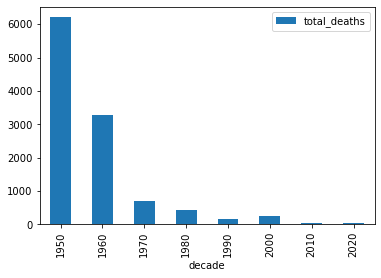

In [20]:
deaths_decade.plot(kind='bar',y='total_deaths')

In [18]:
country_stats=pd.read_csv('country_stats2018.csv')

In [11]:
bins=[0,996,3896,12055,117000]
group_names = ["Low-Income", "Lower-Middle Income", "Upper-Middle Income", "High-Income"]

In [13]:
country_stats['bins']=pd.cut(country_stats['gni_per_capita'],bins,labels=group_names)
country_stats.to_csv('country_stats2018.csv')

In [20]:
summary=disasters[['continent','iso','country','year','disaster_type','disaster_subtype','total_deaths', 'total_affected',
       "total_damages"]]

In [39]:
country = pd.merge(summary,country_stats,on='iso')
country

,continent,iso,country,year,disaster_type,disaster_subtype,total_deaths,total_affected,total_damages,decade,gdp_per_capita,total_co2,co2_per_cap,population,country_x,country_y,standardized,gni_per_capita,bins
0,Asia,IND,India,1950,Earthquake,Ground movement,1500,0,20000,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
1,Asia,IND,India,1950,Flood,Riverine flood,45,25000,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
2,Asia,IND,India,1950,Storm,0,90,0,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
3,Asia,IND,India,1950,Flood,0,100,0,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
4,Asia,IND,India,1952,Storm,Tropical cyclone,400,1000000,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,Oceania,PLW,Palau,2021,Storm,Tropical cyclone,0,7288,0,2020,15895.259900,2.500000e+02,13.957903,17911,Palau,Palau,Palau,17380.0,High-Income
15280,Asia,ARE,United Arab Emirates (the),2017,Flood,0,0,188,0,2010,43839.324490,1.771200e+05,18.390678,9630966,United Arab Emirates,United Arab Emirates,United Arab Emirates,41470.0,High-Income
15281,Asia,QAT,Qatar,2018,Flood,Flash flood,0,1500,10000,2010,65907.948430,8.642000e+04,31.067533,2781682,Qatar,Qatar,Qatar,58830.0,High-Income
15282,Americas,SXM,Sint Maarten (Dutch part),2017,Storm,Tropical cyclone,4,5040,2500000,2010,28988.259210,NaN,NaN,40895,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part),27510.0,High-Income


In [42]:
group = country.groupby(['bins','decade']).mean()
group.to_csv('income_decade.csv')

In [36]:
group=group.reset_index()
group

<AxesSubplot:xlabel='year'>

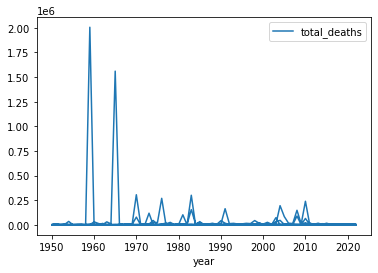

In [35]:
group.plot.line(x='year',y='total_deaths')

In [38]:
summary['decade']=""
for index, row in summary.iterrows():
    year = row['year']
    if year > 2020:
        summary.loc[index,'decade']=2020
    elif year>2010:
        summary.loc[index,'decade']=2010
    elif year>2000:
        summary.loc[index,'decade']=2000
    elif year>1990:
        summary.loc[index,'decade']=1990
    elif year>1980:
        summary.loc[index,'decade']=1980
    elif year>1970:
        summary.loc[index,'decade']=1970
    elif year>1960:
        summary.loc[index,'decade']=1960
    else:
        summary.loc[index,'decade']=1950

C:\Users\nigel\AppData\Local\Temp\ipykernel_11544\1270778004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['decade']=""


In [43]:
country

,continent,iso,country,year,disaster_type,disaster_subtype,total_deaths,total_affected,total_damages,decade,gdp_per_capita,total_co2,co2_per_cap,population,country_x,country_y,standardized,gni_per_capita,bins
0,Asia,IND,India,1950,Earthquake,Ground movement,1500,0,20000,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
1,Asia,IND,India,1950,Flood,Riverine flood,45,25000,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
2,Asia,IND,India,1950,Storm,0,90,0,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
3,Asia,IND,India,1950,Flood,0,100,0,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
4,Asia,IND,India,1952,Storm,Tropical cyclone,400,1000000,0,1950,1998.259076,2.451930e+06,1.812696,1352642283,India,India,India,2010.0,Lower-Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,Oceania,PLW,Palau,2021,Storm,Tropical cyclone,0,7288,0,2020,15895.259900,2.500000e+02,13.957903,17911,Palau,Palau,Palau,17380.0,High-Income
15280,Asia,ARE,United Arab Emirates (the),2017,Flood,0,0,188,0,2010,43839.324490,1.771200e+05,18.390678,9630966,United Arab Emirates,United Arab Emirates,United Arab Emirates,41470.0,High-Income
15281,Asia,QAT,Qatar,2018,Flood,Flash flood,0,1500,10000,2010,65907.948430,8.642000e+04,31.067533,2781682,Qatar,Qatar,Qatar,58830.0,High-Income
15282,Americas,SXM,Sint Maarten (Dutch part),2017,Storm,Tropical cyclone,4,5040,2500000,2010,28988.259210,NaN,NaN,40895,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part),27510.0,High-Income


In [56]:
grouped_country = summary.groupby(['continent','country','iso']).sum()
grouped_country['total_occurrences']=summary.groupby(['continent','country']).count()['disaster_subtype']
grouped_country=grouped_country.reset_index()

In [57]:
country_summary=pd.merge(grouped_country,country_stats,on='iso')

In [60]:
country_summary.to_csv('country_summary.csv',index=False)

In [67]:
country_breakdown=summary.groupby(['country','iso','disaster_type']).sum()
country_breakdown['total_occurrences']=summary.groupby(['country','iso','disaster_type']).count()['disaster_subtype']
country_breakdown.to_csv('country_breakdown.csv')


In [68]:
country_yearly=summary.groupby(['country','iso','year','disaster_type']).sum()
country_yearly['total_occurrences']=summary.groupby(['country','iso','year','disaster_type']).count()['disaster_subtype']
country_yearly.to_csv('country_yearly.csv')
